- [x] Divida o conjunto de dados em conjuntos de treinamento e teste
- [x] Crie o modelo de Árvore de Decisão
- [x] Treine o modelo de Árvore de Decisão
- [x] Faça previsões no conjunto de teste
- [x] Avalie a Matriz de Confusão do modelo de Árvore de Decisão
- [x] Imprima a Árvore de Decisão criada
- [x] Vale a pena mudar algum parâmetro da árvore para obter melhores resultados?
    - Já temos bons resultados, não vale a pena
- [x] Experimente Modelos de Bagging. Boost e Stacking e compare seus desempenhos com o modelo de árvore, sugerido inicialmente

In [1]:
import matplotlib.pyplot as plt
from sklearn.tree import export_text
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Importando Base

In [2]:
mnist = fetch_openml('mnist_784')

## Árvore de classificação
### Segmentando dados de treinamento, teste e realizando o treinamento do modelo

In [3]:
x = mnist.data
y = mnist.target

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [5]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

### Matriz de confusão

In [6]:

# Avalia a precisão do modelo de Árvore de Decisão
accuracy = accuracy_score(y_test, y_pred)
print("Precisão do modelo de Árvore de Decisão:", accuracy)
class_names = sorted(list(mnist.target.unique()))
print(class_names)

Precisão do modelo de Árvore de Decisão: 0.8707142857142857
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1343
           1       0.95      0.95      0.95      1600
           2       0.86      0.83      0.84      1380
           3       0.84      0.83      0.84      1433
           4       0.86      0.87      0.86      1295
           5       0.83      0.82      0.83      1273
           6       0.90      0.90      0.90      1396
           7       0.90      0.91      0.91      1503
           8       0.82      0.81      0.81      1357
           9       0.83      0.83      0.83      1420

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000



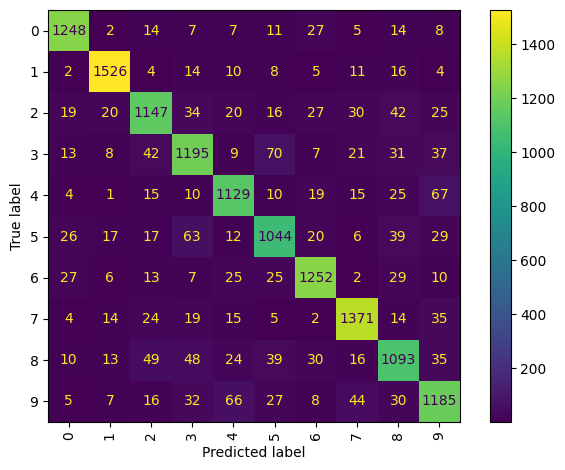

In [7]:
class_report = classification_report(y_test, y_pred, target_names=class_names)

print(class_report)
ConfusionMatrixDisplay.from_estimator(
    classifier, x_test, y_test, display_labels= class_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

### Taxa de acerto por classe

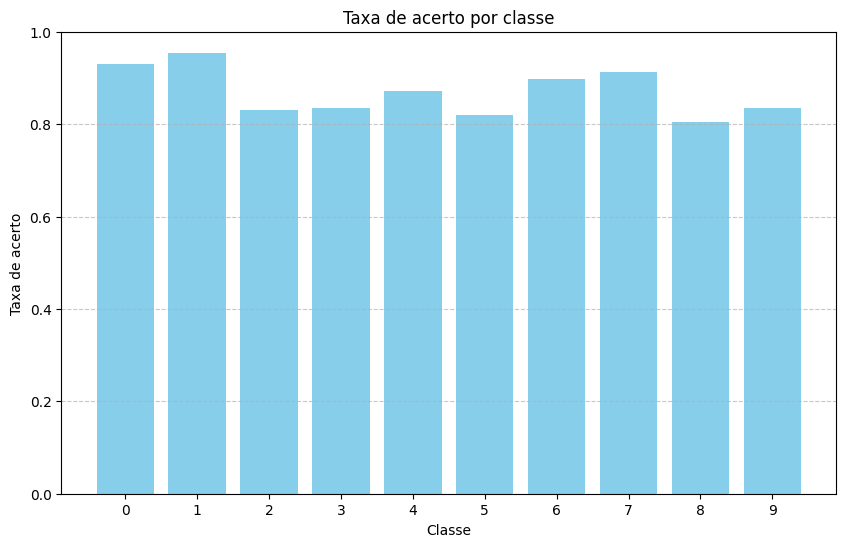

In [8]:
# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular as taxas de acerto de cada classe
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(np.arange(10), class_accuracy, color='skyblue')
plt.title('Taxa de acerto por classe')
plt.xlabel('Classe')
plt.ylabel('Taxa de acerto')
plt.xticks(np.arange(10), np.arange(10))
plt.ylim(0, 1)  # Define o limite y de 0 a 1 para as taxas de acerto
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Exibindo a Árvore de Decisão criada

In [9]:
tree_rules = export_text(classifier, feature_names=mnist['feature_names'])
print(tree_rules)

|--- pixel351 <= 126.50
|   |--- pixel436 <= 0.50
|   |   |--- pixel598 <= 1.50
|   |   |   |--- pixel487 <= 0.50
|   |   |   |   |--- pixel405 <= 0.50
|   |   |   |   |   |--- pixel539 <= 1.00
|   |   |   |   |   |   |--- pixel154 <= 0.50
|   |   |   |   |   |   |   |--- pixel461 <= 21.00
|   |   |   |   |   |   |   |   |--- pixel543 <= 84.50
|   |   |   |   |   |   |   |   |   |--- pixel158 <= 5.00
|   |   |   |   |   |   |   |   |   |   |--- pixel380 <= 164.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 15
|   |   |   |   |   |   |   |   |   |   |--- pixel380 >  164.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- pixel158 >  5.00
|   |   |   |   |   |   |   |   |   |   |--- pixel331 <= 118.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- pixel331 >  118.00
|   |   |   |   |   |   |   |   |   |   |   |--- c

### Begging

In [10]:
# Criar um modelo Bagging com o estimador base
bagging_classifier = BaggingClassifier(n_estimators=50, random_state=42, bootstrap=True)

# Treinar o modelo
bagging_classifier.fit(x_train, y_train)

# Fazer previsões
y_pred_bagging = bagging_classifier.predict(x_test)


### Bagging - Desempenho

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1343
           1       0.98      0.98      0.98      1600
           2       0.93      0.95      0.94      1380
           3       0.96      0.93      0.95      1433
           4       0.94      0.95      0.95      1295
           5       0.94      0.95      0.94      1273
           6       0.97      0.98      0.97      1396
           7       0.97      0.96      0.96      1503
           8       0.94      0.94      0.94      1357
           9       0.94      0.93      0.94      1420

    accuracy                           0.96     14000
   macro avg       0.95      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



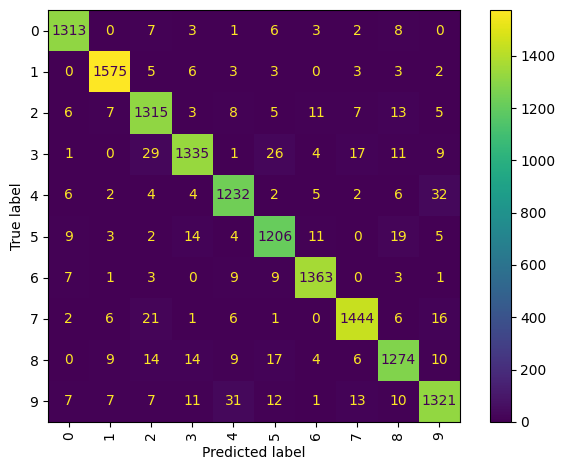

In [11]:
bagging_report = classification_report(y_test, y_pred_bagging, target_names=class_names)

print(bagging_report)
ConfusionMatrixDisplay.from_estimator(
    bagging_classifier, x_test, y_test, display_labels= class_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

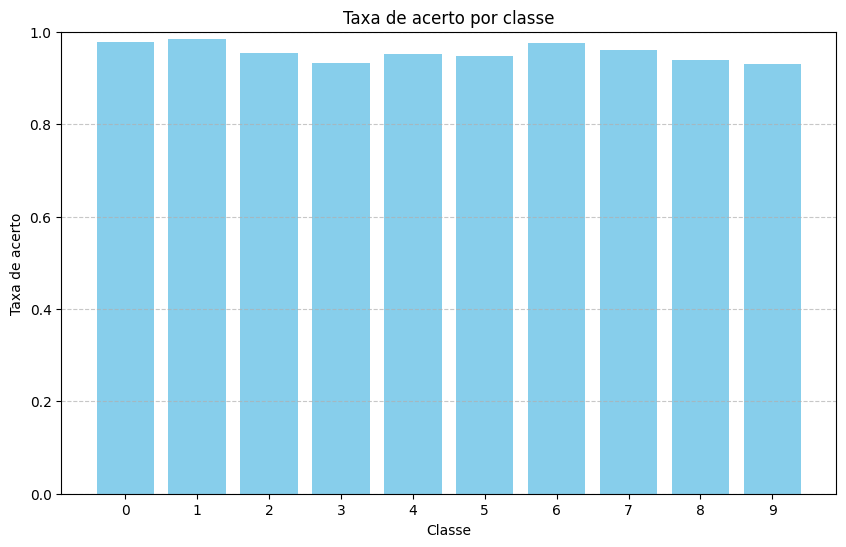

In [12]:
# Calcular a matriz de confusão
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)

# Calcular as taxas de acerto de cada classe
class_accuracy_bagging = conf_matrix_bagging.diagonal() / conf_matrix_bagging.sum(axis=1)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(np.arange(10), class_accuracy_bagging, color='skyblue')
plt.title('Taxa de acerto por classe')
plt.xlabel('Classe')
plt.ylabel('Taxa de acerto')
plt.xticks(np.arange(10), np.arange(10))
plt.ylim(0, 1)  # Define o limite y de 0 a 1 para as taxas de acerto
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Boosting

In [13]:
# Criar um modelo AdaBoost
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Treinar o modelo
adaboost_classifier.fit(x_train, y_train)

# Fazer previsões
y_pred_adaboost = adaboost_classifier.predict(x_test)

c:\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


### Boosting - Desempenho

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1343
           1       0.85      0.94      0.89      1600
           2       0.71      0.55      0.62      1380
           3       0.67      0.65      0.66      1433
           4       0.74      0.58      0.65      1295
           5       0.68      0.59      0.63      1273
           6       0.69      0.82      0.75      1396
           7       0.72      0.70      0.71      1503
           8       0.70      0.69      0.69      1357
           9       0.56      0.70      0.62      1420

    accuracy                           0.72     14000
   macro avg       0.72      0.71      0.71     14000
weighted avg       0.72      0.72      0.71     14000



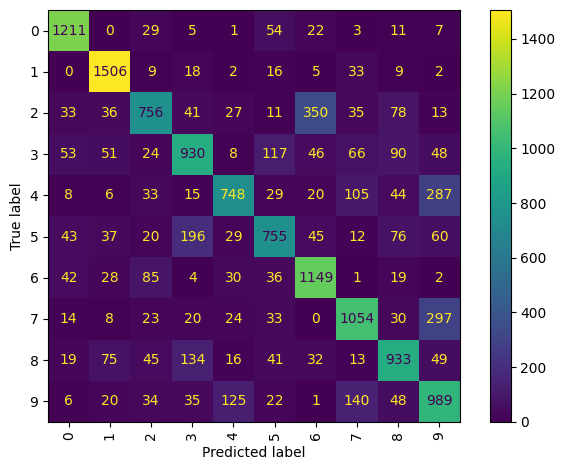

In [14]:
adaboost_report = classification_report(y_test, y_pred_adaboost, target_names=class_names)

print(adaboost_report)
ConfusionMatrixDisplay.from_estimator(
    adaboost_classifier, x_test, y_test, display_labels= class_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

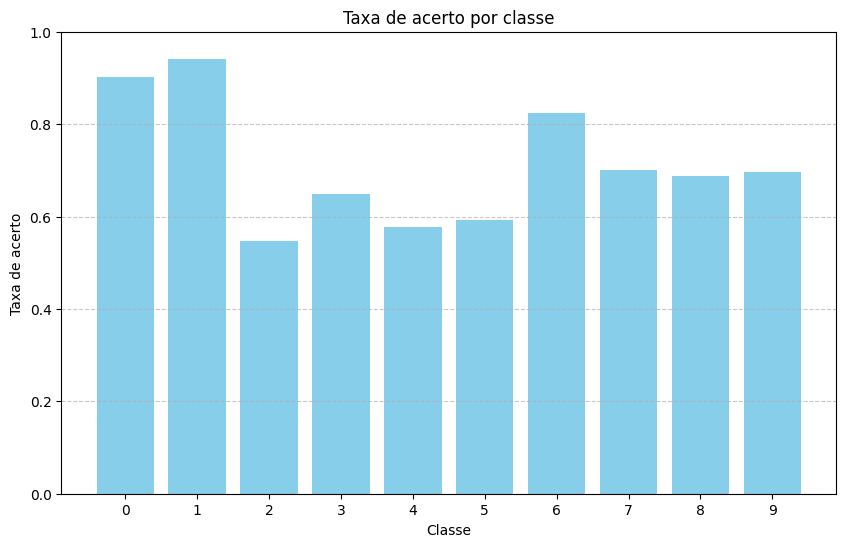

In [15]:
# Calcular a matriz de confusão
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)

# Calcular as taxas de acerto de cada classe
class_accuracy_adaboost = conf_matrix_adaboost.diagonal() / conf_matrix_adaboost.sum(axis=1)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(np.arange(10), class_accuracy_adaboost, color='skyblue')
plt.title('Taxa de acerto por classe')
plt.xlabel('Classe')
plt.ylabel('Taxa de acerto')
plt.xticks(np.arange(10), np.arange(10))
plt.ylim(0, 1)  # Define o limite y de 0 a 1 para as taxas de acerto
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Stacking

In [16]:
# Definir os estimadores base
estimators = [
    ('decision_tree', DecisionTreeClassifier()),
    ('random_forest', RandomForestClassifier())
]

# Definir o estimador final
final_estimator = LogisticRegression()

# Criar o modelo de stacking
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

# Treinar o modelo
stacking_classifier.fit(x_train, y_train)

# Fazer previsões
y_pred_stacking = stacking_classifier.predict(x_test)

### Stacking - Desempenho

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1343
           1       0.99      0.98      0.99      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.99      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.95      0.96      0.96      1357
           9       0.95      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



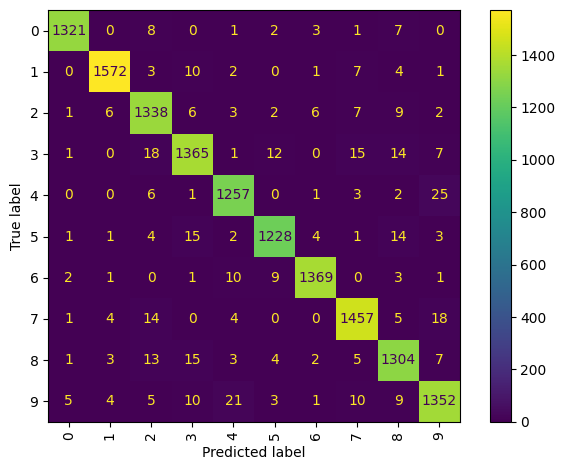

In [17]:
stacking_report = classification_report(y_test, y_pred_stacking, target_names=class_names)

print(stacking_report)
ConfusionMatrixDisplay.from_estimator(
    stacking_classifier, x_test, y_test, display_labels= class_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

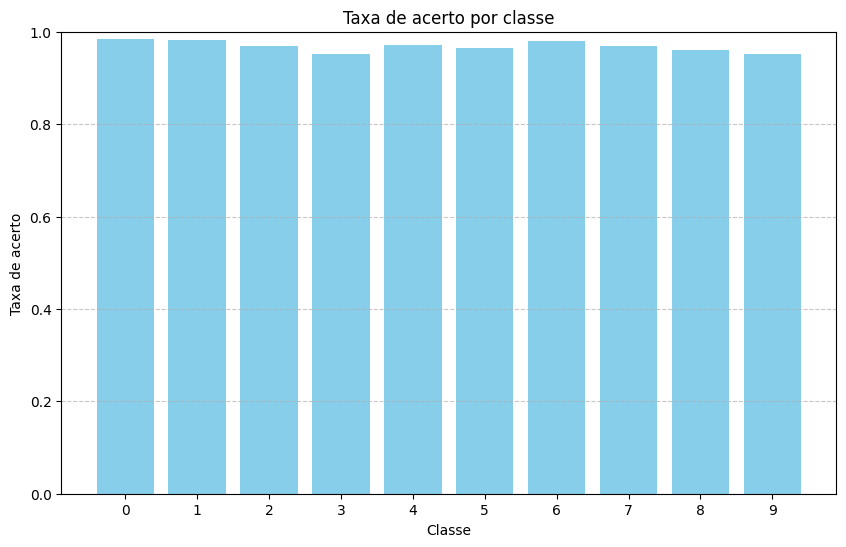

In [18]:
# Calcular a matriz de confusão
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)

# Calcular as taxas de acerto de cada classe
class_accuracy_stacking = conf_matrix_stacking.diagonal() / conf_matrix_stacking.sum(axis=1)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(np.arange(10), class_accuracy_stacking, color='skyblue')
plt.title('Taxa de acerto por classe')
plt.xlabel('Classe')
plt.ylabel('Taxa de acerto')
plt.xticks(np.arange(10), np.arange(10))
plt.ylim(0, 1)  # Define o limite y de 0 a 1 para as taxas de acerto
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Comparando modelos

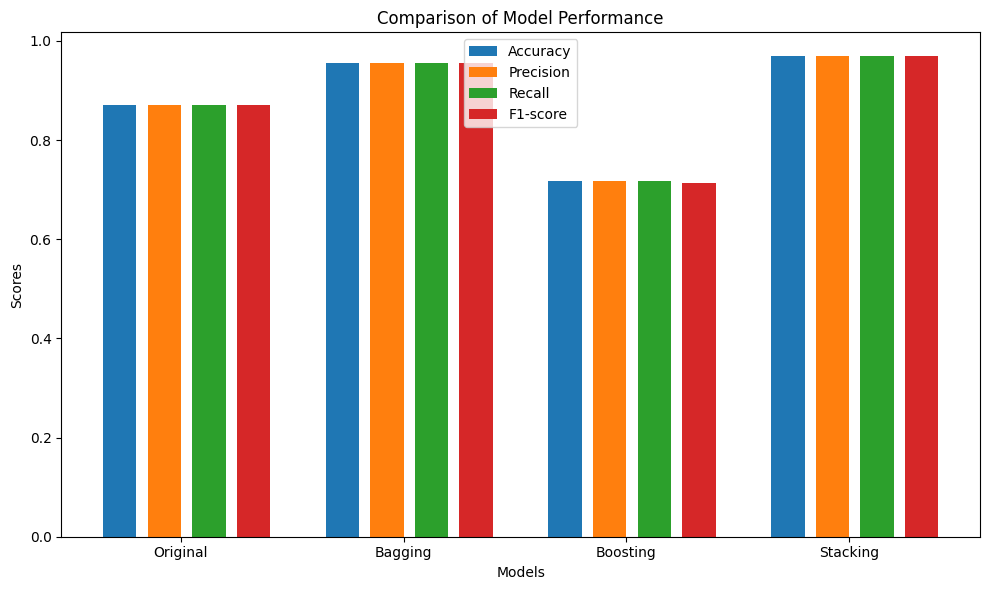

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Definir os modelos e suas previsões
models = ["Original", "Bagging", "Boosting", "Stacking"]
predictions = [y_pred, y_pred_bagging, y_pred_adaboost, y_pred_stacking]

# Calcular as métricas para cada modelo
accuracy = [accuracy_score(y_test, pred) for pred in predictions]
precision = [precision_score(y_test, pred, average='weighted') for pred in predictions]
recall = [recall_score(y_test, pred, average='weighted') for pred in predictions]
f1 = [f1_score(y_test, pred, average='weighted') for pred in predictions]

# Plotar as métricas
x = np.arange(len(models))
width = 0.15  # Largura das barras
spacing = 0.05  # Espaçamento entre as barras

plt.figure(figsize=(10, 6))

plt.bar(x - 1.5 * width - spacing, accuracy, width, label='Accuracy')
plt.bar(x - 0.5 * width, precision, width, label='Precision')
plt.bar(x + 0.5 * width + spacing, recall, width, label='Recall')
plt.bar(x + 1.5 * width + 2 * spacing, f1, width, label='F1-score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Performance')
plt.xticks(x, models)
plt.legend()
plt.tight_layout()
plt.show()

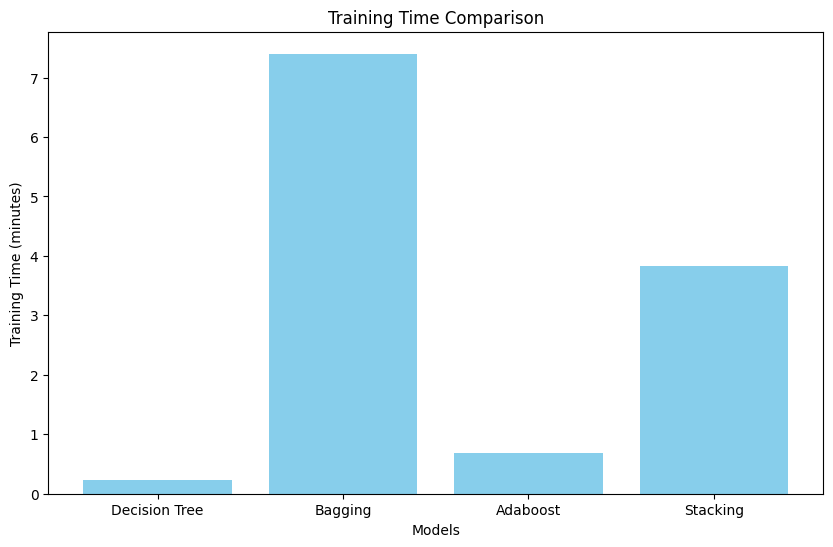

In [20]:
import matplotlib.pyplot as plt

# Definir os modelos e seus tempos de execução
models = ["Decision Tree", "Bagging", "Adaboost", "Stacking"]
times = [14, 7*60+24, 41, 3*60+50]  # Tempos em segundos

# Converter os tempos de execução para minutos
times_minutes = [time / 60 for time in times]

# Plotar o gráfico de barras dos tempos de execução
plt.figure(figsize=(10, 6))
plt.bar(models, times_minutes, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Training Time (minutes)')
plt.title('Training Time Comparison')
plt.show()